In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from PIL import Image

from dataset_utils import load_dataset

In [11]:
dataset = "rsna"  # mimic-cxr, covidx, rsna, chexpert
df, label_names = load_dataset(dataset)
# the most important columns: [img_path, caption, labels]

In [12]:
df.shape

(30227, 3)

In [16]:
np.sum(df.labels)

array([9555])

In [9]:
df.study_id.unique().shape

AttributeError: 'DataFrame' object has no attribute 'study_id'

In [3]:
all_labels = np.stack(df["labels"].values)

Atelectasis 65047


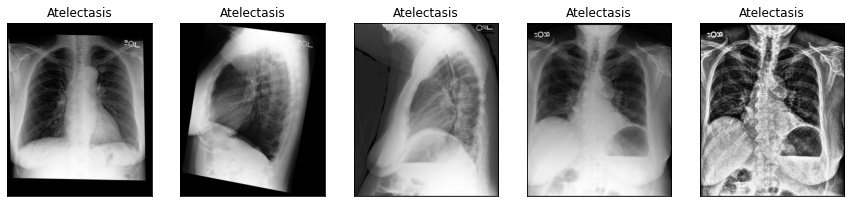

Cardiomegaly 64346


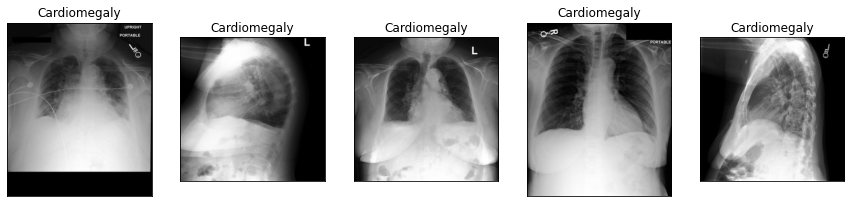

Consolidation 14675


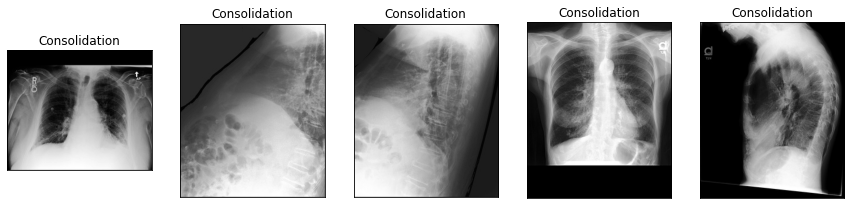

Edema 36564


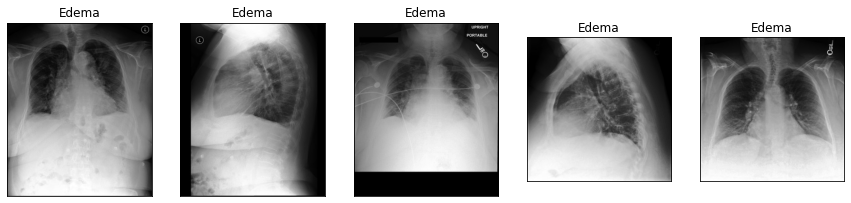

In [20]:

# generalized function
def get_diag_patient(df, all_labels, label_names, diagnosis):
    diag_idx = list(label_names).index(diagnosis)
    diag_mask = all_labels[:, diag_idx] == 1
    return df[diag_mask]


vis_diags = ["Atelectasis", "Cardiomegaly", "Consolidation", "Edema"]

# get pats for each diagnosis
for diag in vis_diags:
    diag_pats = get_diag_patient(df, all_labels, label_names, diag)
    print(diag, len(diag_pats))
    # plot some images
    imgs = [Image.open(img_path) for img_path in diag_pats["img_path"].values[:5]]
        
    # put all in one figure
    fig, ax = plt.subplots(1, len(imgs), figsize=(15, 5))
    for i, img in enumerate(imgs):
        ax[i].imshow(img, cmap="gray")
        # remove ticks and labels
        ax[i].tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
        ax[i].set_title(diag)
    plt.show()

In [223]:
# get patients with atelectasis
diag = vis_diags[0]
diag_pats = get_diag_patient(df, all_labels, label_names, diag)
print("Diag: ", diag, len(diag_pats))

Diag:  Atelectasis 65047


In [224]:
# show nth patient with selected diagnosis
n = 30

44


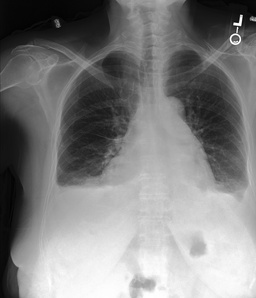

WET READ: _ _ _ 8:49 PM Moderate cardiomegaly, bilateral small pleural effusions with adjacent atelectasis, and engorgement of the pulmonary vasculature. These findings are suggestive of heart failure. _ PA AND LATERAL CHEST, _ HISTORY: woman with a renal transplant. Now with lower extremity edema and dyspnea. IMPRESSION: PA and lateral chest reviewed in the absence of prior chest imaging: Moderate bilateral pleural effusions layer dependently. Cardiac silhouette has a peculiar shape, and a larger than expected component to the right of midline. Whether this is due to cardiomegaly or pericardial effusion is indeterminate. There is no particular distention of either pulmonary or mediastinal vasculature to suggest one or the other. Bibasilar atelectasis is relatively mild, and there is no pulmonary edema. Aortic contour is normal. Dr. _ was paged.

WET READ: _ _ _ 8:49 PM Moderate cardiomegaly, bilateral small pleural effusions with adjacent atelectasis, and engorgement of the pulmonary 

In [238]:
n = n + 1
print(n)
# show pat
diag_patient = diag_pats.iloc[n]
# show image
img_path = diag_patient["img_path"]
img = Image.open(img_path)
img.show()

idx = diag_patient["caption"].lower().find(diag.lower())
if idx == -1 and diag == "Cardiomegaly":
    # if cardiomegaly, serach for "Heart size" as well
    idx = diag_patient["caption"].lower().find("heart size")
if idx != -1:
    # print rreport 
    print(diag_patient["caption"])

    # print sentence in which diagnosis is mentioned
    print()
    
    sentences = diag_patient["caption"].split(".")
    sent_lens = [len(sent) for sent in sentences]
    sent_cum = np.cumsum(sent_lens)
    sent_idx = np.where(sent_cum >= idx)[0][0]
    print(sentences[sent_idx])


In [222]:
save = 1
if save:
    base_path = "plots/example_pats/"
    os.makedirs(base_path, exist_ok=True)
    # save current image and report 
    img_path = diag_patient["img_path"]
    img = Image.open(img_path)
    img_name = os.path.join(base_path, f"{diag}_{n}.png")
    img.save(img_name)
    # save report
    with open(os.path.join(base_path, f"{diag}_{n}.txt"), "w") as f:
        f.write(diag_patient["caption"])

In [56]:
cardiomegaly_idx = 150, 400

-1

In [24]:
diag_mask.sum()

In [10]:
# histogram of token lenghts
from clip.simple_tokenizer import SimpleTokenizer

tokenizer = SimpleTokenizer()

tokens = df["caption"].apply(tokenizer.encode)

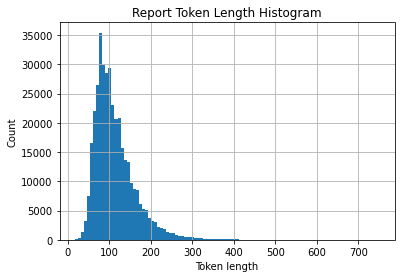

In [20]:
token_lens = tokens.apply(lambda x: len(x))

import matplotlib.pyplot as plt

token_lens.hist(bins=100)
plt.xlabel("Token length")
plt.ylabel("Count")
plt.title("Report Token Length Histogram")
plt.savefig("plots/token_length_histogram.pdf", dpi=300, bbox_inches="tight")

In [21]:
# bar plot of label distrs
labels = np.stack(df["labels"].to_list())

label_df = pd.DataFrame(labels, columns=label_names)


In [27]:
# get counts of how many -1, 0, 1 and NaNs each labels has
label_counts = label_df.apply(lambda x: x.value_counts(dropna=False))

In [26]:
help(df.value_counts)

Help on method value_counts in module pandas.core.frame:

value_counts(subset: 'Sequence[Hashable] | None' = None, normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False, dropna: 'bool' = True) method of pandas.core.frame.DataFrame instance
    Return a Series containing counts of unique rows in the DataFrame.
    
    .. versionadded:: 1.1.0
    
    Parameters
    ----------
    subset : list-like, optional
        Columns to use when counting unique combinations.
    normalize : bool, default False
        Return proportions rather than frequencies.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    dropna : bool, default True
        Don’t include counts of rows that contain NA values.
    
        .. versionadded:: 1.3.0
    
    Returns
    -------
    Series
    
    See Also
    --------
    Series.value_counts: Equivalent method on Series.
    
    Notes
    -----
    The return

In [28]:
label_counts

,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
-1.0,15536,8469,6503,19409,12585,1053,2027,5916,NaN,8587,1397,29150,1562,361
0.0,2247,24966,14199,40919,8706,1755,1719,5106,NaN,43346,249,43358,57719,5159
1.0,65047,64346,14675,36564,10042,7605,10801,76423,143352.0,76957,3460,26222,14257,84073
NaN,294265,279314,341718,280203,345762,366682,362548,289650,233743.0,248205,371989,278365,303557,287502


In [36]:
label_counts_transposed = label_counts.T.sort_values(1.0)

In [50]:
help(label_counts_transposed.plot.bar)

Help on method bar in module pandas.plotting._core:

bar(x=None, y=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Vertical bar plot.
    
    A bar plot is a plot that presents categorical data with
    rectangular bars with lengths proportional to the values that they
    represent. A bar plot shows comparisons among discrete categories. One
    axis of the plot shows the specific categories being compared, and the
    other axis represents a measured value.
    
    Parameters
    ----------
    x : label or position, optional
        Allows plotting of one column versus another. If not specified,
        the index of the DataFrame is used.
    y : label or position, optional
        Allows plotting of one column versus another. If not specified,
        all numerical columns are used.
    color : str, array-like, or dict, optional
        The color for each of the DataFrame's columns. Possible values are:
    
        - A single color string referred to by

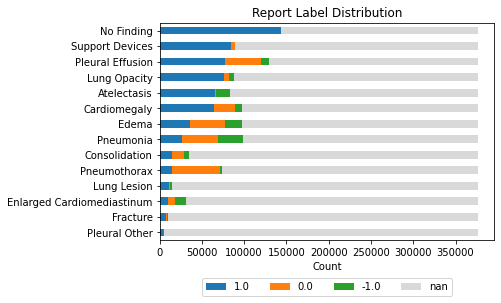

In [60]:
ax = label_counts_transposed.plot.barh(stacked=True, y=[1.0, 0.0, -1.0, np.nan], 
                                       color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d9d9d9"])
plt.title("Report Label Distribution")
plt.xlabel("Count")
# put legend below the figure 
plt.legend(bbox_to_anchor=(0.5, -0.15), loc="upper center", ncol=4)
plt.savefig("plots/label_distribution.pdf", dpi=300, bbox_inches="tight")

In [5]:
label_names

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
       'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices'], dtype='<U26')

In [6]:
df

,subject_id,study_id,img_id,img_path,raw_caption,caption,split,labels
0,10000032,50414267,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,/raid/datasets/mimic-cxr/jpg/small_files/p10/p...,FINAL REPORT\...,INDICATION: _F with new onset ascites // eval ...,train,"[nan, nan, nan, nan, nan, nan, nan, nan, 1.0, ..."
1,10000032,50414267,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,/raid/datasets/mimic-cxr/jpg/small_files/p10/p...,FINAL REPORT\...,INDICATION: _F with new onset ascites // eval ...,train,"[nan, nan, nan, nan, nan, nan, nan, nan, 1.0, ..."
2,10000032,53189527,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,/raid/datasets/mimic-cxr/jpg/small_files/p10/p...,FINAL REPORT\...,INDICATION: History: _F with shortness of brea...,train,"[nan, nan, nan, nan, nan, nan, nan, nan, 1.0, ..."
3,10000032,53189527,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,/raid/datasets/mimic-cxr/jpg/small_files/p10/p...,FINAL REPORT\...,INDICATION: History: _F with shortness of brea...,train,"[nan, nan, nan, nan, nan, nan, nan, nan, 1.0, ..."
4,10000032,53911762,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,/raid/datasets/mimic-cxr/jpg/small_files/p10/p...,FINAL REPORT\...,INDICATION: _F with cough // acute process? FI...,train,"[nan, nan, nan, nan, nan, nan, nan, nan, 1.0, ..."
...,...,...,...,...,...,...,...,...
377105,19999733,57132437,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,/raid/datasets/mimic-cxr/jpg/small_files/p19/p...,FINAL REPORT\...,INDICATION: with chest pain. FINDINGS: The lun...,train,"[nan, nan, nan, nan, nan, nan, nan, nan, 1.0, ..."
377106,19999733,57132437,58c403aa-35ff8bd9-73e39f54-8dc9cc5d-e0ec3fa9,/raid/datasets/mimic-cxr/jpg/small_files/p19/p...,FINAL REPORT\...,INDICATION: with chest pain. FINDINGS: The lun...,train,"[nan, nan, nan, nan, nan, nan, nan, nan, 1.0, ..."
377107,19999987,55368167,58766883-376a15ce-3b323a28-6af950a0-16b793bd,/raid/datasets/mimic-cxr/jpg/small_files/p19/p...,FINAL REPORT\...,PORTABLE CHEST OF _ FINDINGS: There has been i...,train,"[1.0, -1.0, nan, nan, nan, nan, 0.0, nan, nan,..."
377108,19999987,58621812,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,/raid/datasets/mimic-cxr/jpg/small_files/p19/p...,FINAL REPORT\...,CLINICAL HISTORY: Transfer from outside hospit...,train,"[1.0, nan, nan, nan, nan, nan, nan, nan, nan, ..."


In [36]:
idx = 29519
df["caption"].iloc[idx]

'Comparison is made with a prior chest radiograph from _ as well as a CT chest from _. CLINICAL HISTORY: Dyspnea, question acute process. FINDINGS: PA and lateral views of the chest are provided. Lungs are clear bilaterally without focal consolidation, effusion, or pneumothorax. The heart and mediastinal contours are normal. The bony structures are intact. There is no free air below the right hemidiaphragm. IMPRESSION: No acute findings in the chest.'

In [57]:
from clip.simple_tokenizer import SimpleTokenizer
tokenizer = SimpleTokenizer()
encoded = tokenizer.encode(df["caption"].iloc[idx])
print(len(encoded))
tokenizer.decode(encoded[:75])


151


's history : epigastric chest pain with excessive burping . findings : the heart is at the upper limits of normal size . there is moderate tortuosity of the thoracic aorta . a small eventration is noted along the anterior right hemidiaphragm . the lungs appear clear . there are no pleural effusions or pneumothorax '

In [5]:
df.columns

Index(['study_id', 'img_path', 'source', 'split', 'labels'], dtype='object')

In [5]:
from ffcv_custom_PTL_methods import FFCVCLDataset
ds = FFCVCLDataset(df["img_path"], df["labels"], df["caption"], max_len=2000, max_tokens=400)

In [6]:
#import clip
#clip.tokenize(df["caption"].iloc[100000], truncate=True)

In [33]:
np.random.randint(0, 2)

0

In [69]:
@numba.njit()
def subsample(tokens, dst):
                end_idx = np.where(tokens == 49407)[0][0]
                real_tokens = tokens[1: end_idx][:77 - 2]
                
                shortened = np.zeros((77,), dtype=np.int32)
                shortened[0] = 49406
                shortened[1: 1 + len(real_tokens)] = real_tokens
                shortened[1 + len(real_tokens)] = 49407
                
                return shortened

In [53]:
a = tokens.copy()
a[a == 49407] = 0

In [55]:
subsample(a, None).shape

IndexError: index 0 is out of bounds for axis 0 with size 0

In [44]:
sample_tokens_until_size(tokens)

array([49406, 38539,   281,  2308,   593,  2459,  7637,  2580,   269,
       29818,  4657,   269, 16529,   281,   518, 27366,   631,  3143,
         539, 30934, 41111,   267,   926, 33948,  1490,  9364,   541,
       28714,   617,  4130,  9203,   269,   518,  1936,  3235,   533,
        5967,   269,   518,  1436,  1761, 19178,  2036,  1491,   631,
        5967,   269,  6470, 16386, 16594,  1965,   962,   518,  1823,
        9475,   267,   537,   896,  1823, 18298, 46213,   631, 22501,
         269, 14468,   281,   871, 19734,  6211, 39858,   749,   856,
        4078,   269, 49407,     0,     0], dtype=int32)

In [43]:
tokens.dtype

dtype('int32')

In [40]:
out = ds[6]
tokens = out[2]
short = sample_tokens_until_size(tokens)
short.shape

(77,)

In [41]:
%timeit sample_tokens_until_size(tokens)

9.48 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [38]:
%timeit sample_tokens_until_size(tokens)

9.43 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [198]:
len(final_tokens)

89

In [103]:
shortened.shape

(77,)

In [78]:
shortened

In [86]:
len(final_tokens)

89

In [88]:
print(shortened.shape)
shortened

(77,)


array([49406, 38539,   281,   318,   325,   593,   686, 30527, 22720,
        2454,  3502,  9703,   556, 14774, 16529,   281,   997,   533,
         871, 30934, 41111,   267,   926, 33948,  1490,  9364,   541,
       28714,   617,  4130,  9203,   269,   518,  6211,  3693,   570,
        1761, 19178, 26149,   533,  5967,   269, 16594,  1965,   962,
         518,  1823, 16271,   267, 16508,  4154,   518,  9475,   269,
         518,  2316,   538,  7067,   596,  2164,   576,   533,   569,
       12404,   269, 13677,   561, 42290,   539,   518, 22881,  2498,
        1823, 12909,   537, 17568, 49407])

In [25]:
out[2]

array([49406, 38539,   281,   318,   325,   593,   686, 30527, 22720,
        2454,  3502,  9703,   556, 14774, 16529,   281,   997,   533,
         871, 30934, 41111,   267,   926, 33948,  1490,  9364,   541,
       28714,   617,  4130,  9203,   269, 25599,   578,   691,  1652,
         676,   546,  1480,   682,  1096,  5256,  8406, 45987, 12971,
         269,   518,  6211,  3693,   570,  1761, 19178, 26149,   533,
        5967,   269, 16594,  1965,   962,   518,  1823, 16271,   267,
       16508,  4154,   518,  9475,   269,   518,  2316,   538,  7067,
         596,  2164,   576,   533,   569, 12404,   269, 13677,   561,
       42290,   539,   518, 22881,  2498,  1823, 12909,   537, 17568,
       17519,   631, 22501,   269, 14468,   281,   871, 19734,  6211,
       39858,   749,   856,  4078,   269, 49407,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [51]:
len(ds.labels[0])

14

In [7]:
from ffcv_custom_PTL_methods import Tokenizer

tokenizer = Tokenizer(truncate=False)

In [12]:
idx = 0

text = df["caption"].iloc[idx]
tokens = tokenizer(text)
print(len(text))
print(len(tokens))

478
105


In [14]:
all_tokens = df["caption"].apply(tokenizer)

In [15]:
lens = all_tokens.apply(lambda x: len(x))

In [20]:
lens.describe()

count    377095.000000
mean        115.559917
std          49.713536
min          19.000000
25%          81.000000
50%         104.000000
75%         137.000000
max         753.000000
Name: caption, dtype: float64

In [19]:
lens.quantile(0.999)

410.0

In [22]:
tokenizer("Halloo. . hi .. what? wow.")

array([49406,  3463,   334,   269,   269,  1883,   852,   768,   286,
        2781,   269, 49407], dtype=int32)

In [9]:
df["split"].unique()

array(['train', 'validate', 'test'], dtype=object)

In [10]:
val_df = df[df["split"] == "validate"]

In [24]:
val_labels = np.stack(list(val_df["labels"]))

In [41]:
val_labels[val_labels == -1] = 0
val_labels[np.isnan(val_labels)] = 0

In [42]:
val_labels.shape

(2991, 14)

In [58]:
np.unique(val_labels[:, 14])

IndexError: index 14 is out of bounds for axis 1 with size 14

In [71]:
import numpy as np

max_len = 2000


for i in range(len(df)):
    text = df["caption"][i][-max_len:]  # delete first instead of last characters as the last sentences usually contain the finding
    # pad
    padded_text = text + (" " * (max_len - len(text)))
    padded_text = np.frombuffer(padded_text.encode('ascii', errors="ignore"), dtype='uint8')
    assert len(padded_text) == 2000, (len(text), len(padded_text), text, padded_text)

AssertionError: (410, 1999, 'INDICATION: man with History of right pleurodesis with apical blebectomy for spontaneous pneumothorax ×2, _ now with upper respiratory congestion associated with left mid axillary discomfort // Please evaluate for evidence of left pneumothorax, pneumonia IMPRESSION: Heart size is normal. Postsurgical changes of the right hemithorax are stable. Lungs are clear. No pleural effusion or pneumothorax is present.', array([73, 78, 68, ..., 32, 32, 32], dtype=uint8))

In [78]:
text.encode("ascii", errors="replace").replace(b"?", b" ")

b'INDICATION: man with History of right pleurodesis with apical blebectomy for spontaneous pneumothorax  2, _ now with upper respiratory congestion associated with left mid axillary discomfort // Please evaluate for evidence of left pneumothorax, pneumonia IMPRESSION: Heart size is normal. Postsurgical changes of the right hemithorax are stable. Lungs are clear. No pleural effusion or pneumothorax is present.'

In [73]:
help(text.encode)

Help on built-in function encode:

encode(encoding='utf-8', errors='strict') method of builtins.str instance
    Encode the string using the codec registered for encoding.
    
    encoding
      The encoding in which to encode the string.
    errors
      The error handling scheme to use for encoding errors.
      The default is 'strict' meaning that encoding errors raise a
      UnicodeEncodeError.  Other possible values are 'ignore', 'replace' and
      'xmlcharrefreplace' as well as any other name registered with
      codecs.register_error that can handle UnicodeEncodeErrors.



In [77]:
codecs

AttributeError: type object 'str' has no attribute 'codecs'

In [34]:
lens.describe()

count    377095.0
mean         14.0
std           0.0
min          14.0
25%          14.0
50%          14.0
75%          14.0
max          14.0
Name: labels, dtype: float64

<AxesSubplot:>

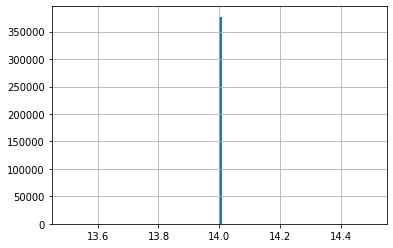

In [33]:
lens.hist(bins=100)

In [31]:
df["caption"][lens < 100].iloc[-5]

'CHEST HISTORY: Lymphoma, NG tube placement. FINDINGS: The NG tube is in the fundus of the stomach.'

In [5]:
#import clip

In [6]:
labels_per_img = df["labels"].apply(lambda x: sum(x == 1))

Text(0.5, 1.0, 'Overall count of True labels per image')

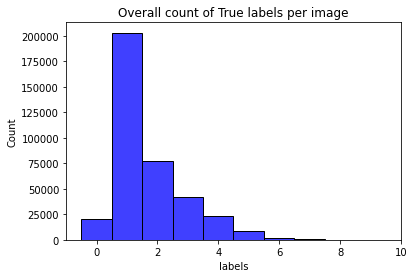

In [7]:
sns.histplot(labels_per_img, color="blue", discrete=True)
plt.title("Overall count of True labels per image")

In [8]:
# num available labels per img

In [9]:
# num images per label

In [18]:
df.shape

(377095, 8)

(345, 320)
[(nan, 'No Finding'), (nan, 'Enlarged Cardiomediastinum'), (nan, 'Cardiomegaly'), (1.0, 'Lung Opacity'), (nan, 'Lung Lesion'), (1.0, 'Edema'), (nan, 'Consolidation'), (nan, 'Pneumonia'), (1.0, 'Atelectasis'), (nan, 'Pneumothorax'), (1.0, 'Pleural Effusion'), (nan, 'Pleural Other'), (nan, 'Fracture'), (nan, 'Support Devices')]


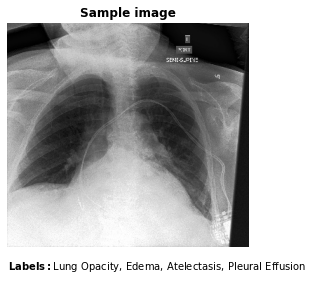

In [20]:
# show qualitative data
idx = 1 + 3 #377095 - 200

path = df["img_path"].iloc[idx]
img = Image.open(path)
print(img.size)
fig = plt.figure()
p = plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Sample image", fontweight="bold")
#cap_text = plt.text(0, img.height + 10, r"$\bf{Caption: }$" + df["caption"].iloc[idx])
labels = df.iloc[idx]["labels"]
print(list(zip(labels, label_names)))
label_text = plt.text(0, img.height + 0.1 * img.height, r"$\bf{Labels: }$" + ", ".join(list(np.array(label_names)[labels == 1])))
plt.tight_layout()
plt.savefig(os.path.join(dataset, f"sample_{idx}.pdf"), dpi=300)
plt.show()
if "caption" in df.columns:
    print(df["caption"].iloc[idx])

In [30]:
label_names

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
       'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices'], dtype='<U26')

In [64]:
len(df) / 1744 * 58.4 / 60 / 60

3.5076369775739042

In [47]:
# check how long it takes to open img
import random
%timeit Image.open(df["img_path"].iloc[random.randint(0, len(df) - 1)])

80.2 ms ± 38.4 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
